[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/06_population_multiple/sheep_rabbits.ipynb)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Define model of competition
# See 'MultiSpecies_slides.pdf': page 16-26
def rhs1(t, X, a1, a2, b1, b2):
    """Define the differential equation of model of competition

    Args:
        t (float): time
        X (numpy.ndarray): population
        a1 (float): parameter value
        a2 (float): parameter value
        b1 (float): parameter value
        b2 (float): parameter value

    Returns:
        numpy.ndarray: differential equation
        
    """
    
    x = X[0]
    y = X[1]
    u = x * (a1 - b1*y)
    v = y * (a2 - b2*x)
    U = [u, v]
    
    return U

In [3]:
# Define model of competition with carrying capacity
# See 'MultiSpecies_slides.pdf': page 16-26
def rhs2(t, X, a1, a2, b1, b2, c1, c2):
    """Define the differential equation of model of competition
    with carrying capacity

    Args:
        t (float): time
        X (numpy.ndarray): population
        a1 (float): parameter value
        a2 (float): parameter value
        b1 (float): parameter value
        b2 (float): parameter value
        c1 (float): parameter value
        c2 (float): parameter value

    Returns:
        numpy.ndarray: differential equation
        
    """
    
    x = X[0]
    y = X[1]
    u = x * (a1 - c1*x - b1*y)
    v = y * (a2 - b2*x - c2*y)
    U = [u, v]
    
    return U

In [4]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

Plot phase portrait of predator–prey models based on Mesterton–Gibbons

Version 1: inter-species competition

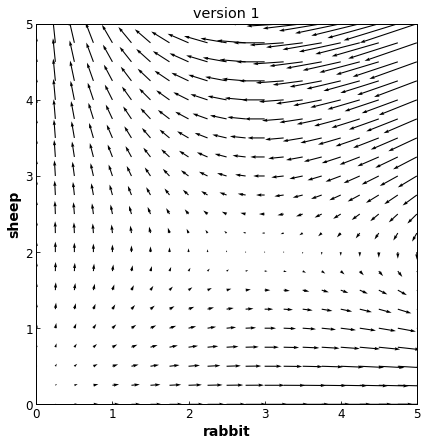

In [5]:
# Quiver of version 1: inter-species competition
N = 20
x1 = 0.
x2 = 5.
dx = (x2-x1) / N

y1 = 0.
y2 = 5.
dy = (y2-y1) / N

dimx = np.size(np.arange(x1, x2+0.5*dx, dx))
dimy = np.size(np.arange(y1, y2+0.5*dy, dy))
u = np.zeros((dimx,dimy), dtype=np.float32)
v = np.zeros((dimx,dimy), dtype=np.float32)
x,y = np.meshgrid(np.arange(x1, x2+0.5*dx, dx), np.arange(y1, y2+0.5*dy, dy))

a1 = 4.
b1 = 2.
a2 = 3.
b2 = 1.

for i in range(dimx): 
    for j in range(dimy):
        X = [x[i,j], y[i,j]]
        t=0
        U = rhs1(t, X, a1, a2, b1, b2)
        u[i,j] = U[0]
        v[i,j] = U[1]

# Plot quiver
fig, ax = plt.subplots(1,1,figsize=(9,7))

ax.quiver(x, y, u, v, scale=200)

# Set axes range
ax.set_aspect('equal')
ax.set_xlim([x1, x2])
ax.set_ylim([y1, y2])

# Set title and axes labels
ax.set_title('version 1')
ax.set_xlabel('rabbit')
ax.set_ylabel('sheep')

plt.show()

Add phase space trajectory to version 1

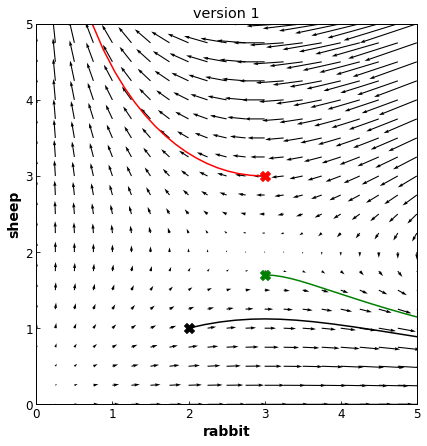

In [6]:
# Plot quiver and trajectory
fig, ax = plt.subplots(1,1,figsize=(9,7))

ax.quiver(x, y, u, v, scale=200)

# Phase space trajectory
tspan = [0., 10.]
X0 = [2., 1.]
# Solve ODE with 'Radau' or 'BDF' for stiff problems
sol = solve_ivp(rhs1, tspan, X0, args=(a1, a2, b1, b2), method='Radau', rtol=1e-6)
# Unpack solution
T, X = sol.t, sol.y
# Plot trajectory and start point
ax.scatter(X0[0], X0[1], marker='X', color='k', s=100)
ax.plot(X[0,:], X[1,:], color='k', linewidth=1.5)

tspan = [0., 10.]
X0 = [3., 3.]
# Solve ODE with 'Radau' or 'BDF' for stiff problems
sol = solve_ivp(rhs1, tspan, X0, args=(a1, a2, b1, b2), method='Radau', rtol=1e-6)
# Unpack solution
T, X = sol.t, sol.y
# Plot trajectory and start point
ax.scatter(X0[0], X0[1], marker='X', color='r', s=100)
ax.plot(X[0,:], X[1,:], color='r', linewidth=1.5)

tspan = [0., 10.]
X0 = [3., 1.7]
# Solve ODE with 'Radau' or 'BDF' for stiff problems
sol = solve_ivp(rhs1, tspan, X0, args=(a1, a2, b1, b2), method='Radau', rtol=1e-6)
# Unpack solution
T, X = sol.t, sol.y
# Plot trajectory and start point
ax.scatter(X0[0], X0[1], marker='X', color='g', s=100)
ax.plot(X[0,:], X[1,:], color='g', linewidth=1.5)

# Set axes range
ax.set_aspect('equal')
ax.set_xlim([x1, x2])
ax.set_ylim([y1, y2])

# Set title and axes labels
ax.set_title('version 1')
ax.set_xlabel('rabbit')
ax.set_ylabel('sheep')

plt.show()

Version 2: add some intra-species competition

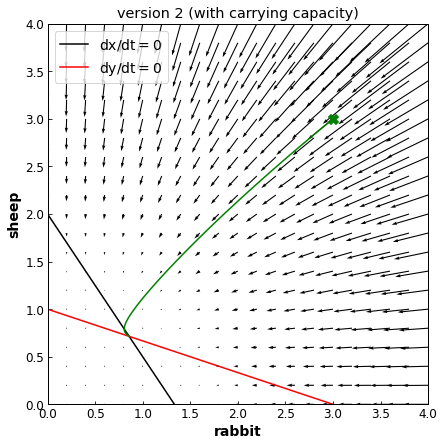

In [7]:
# Quiver of version 2: intra-species competition
N = 20
x1 = 0.
x2 = 4.
dx = (x2-x1) / N

y1 = 0.
y2 = 4.
dy = (y2-y1) / N

dimx = np.size(np.arange(x1, x2+0.5*dx, dx))
dimy = np.size(np.arange(y1, y2+0.5*dy, dy))
u = np.zeros((dimx,dimy), dtype=np.float32)
v = np.zeros((dimx,dimy), dtype=np.float32)
x,y = np.meshgrid(np.arange(x1, x2+0.5*dx, dx), np.arange(y1, y2+0.5*dy, dy))

a1 = 4. 
b1 = 2.
a2 = 3.
b2 = 1.
c1 = 3.
c2 = 3.

for i in range(dimx): 
    for j in range(dimy):
        X = [x[i,j], y[i,j]]
        t=0
        U = rhs2(t, X, a1, a2, b1, b2, c1, c2)
        u[i,j] = U[0]
        v[i,j] = U[1]

# Plot solution
fig, ax = plt.subplots(1,1,figsize=(9,7))

ax.quiver(x, y, u, v, scale=500)
ax.plot([0., 4.], [a1/b1 - (c1/b1)*0., a1/b1 - (c1/b1)*4.], color='k', label=r'$dx/dt=0$')
ax.plot([a2/b2 - (c2/b2)*0., a2/b2 - (c2/b2)*4.], [0., 4.], color='r', label=r'$dy/dt=0$')

# Phase space trajectory
tspan = [0., 20.]
X0 = [3., 3.]
# Solve ODE with 'Radau' or 'BDF' for stiff problems
sol = solve_ivp(rhs2, tspan, X0, args=(a1, a2, b1, b2, c1, c2), method='Radau', rtol=1e-6)
# Unpack solution
T, X = sol.t, sol.y
# Plot trajectory and start point
ax.scatter(X0[0], X0[1], marker='X', color='g', s=100)
ax.plot(X[0,:], X[1,:], color='g', linewidth=1.5)

# Set axes range
ax.set_aspect('equal')
ax.set_xlim([x1, x2])
ax.set_ylim([y1, y2])

# Set title, axes labels and legends
ax.set_title('version 2 (with carrying capacity)')
ax.set_xlabel('rabbit')
ax.set_ylabel('sheep')
ax.legend(loc='upper left')

plt.show()

Version 2 with different parameters

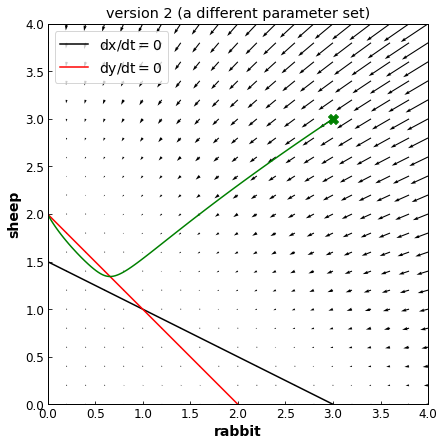

In [8]:
# Quiver of version 2: intra-species competition
N = 20
x1 = 0.
x2 = 4.
dx = (x2-x1) / N

y1 = 0.
y2 = 4.
dy = (y2-y1) / N

dimx = np.size(np.arange(x1, x2+0.5*dx, dx))
dimy = np.size(np.arange(y1, y2+0.5*dy, dy))
u = np.zeros((dimx,dimy), dtype=np.float32)
v = np.zeros((dimx,dimy), dtype=np.float32)
x,y = np.meshgrid(np.arange(x1, x2+0.5*dx, dx), np.arange(y1, y2+0.5*dy, dy))

a1 = 3. 
b1 = 2.
a2 = 2.
b2 = 1.
c1 = 1.
c2 = 1.

for i in range(dimx): 
    for j in range(dimy):
        X = [x[i,j], y[i,j]]
        t=0
        U = rhs2(t, X, a1, a2, b1, b2, c1, c2)
        u[i,j] = U[0]
        v[i,j] = U[1]

# Plot solution
fig, ax = plt.subplots(1,1,figsize=(9,7))

ax.quiver(x, y, u, v, scale=500)
ax.plot([0., 4.], [a1/b1 - (c1/b1)*0., a1/b1 - (c1/b1)*4.], color='k', label=r'$dx/dt=0$')
ax.plot([a2/b2 - (c2/b2)*0., a2/b2 - (c2/b2)*4.], [0., 4.], color='r', label=r'$dy/dt=0$')

# Phase space trajectory
tspan = [0., 20.]
X0 = [3., 3.]
# Solve ODE with 'Radau' or 'BDF' for stiff problems
sol = solve_ivp(rhs2, tspan, X0, args=(a1, a2, b1, b2, c1, c2), method='Radau', rtol=1e-6)
# Unpack solution
T, X = sol.t, sol.y
# Plot trajectory and start point
ax.scatter(X0[0], X0[1], marker='X', color='g', s=100)
ax.plot(X[0,:], X[1,:], color='g', linewidth=1.5)

# Set axes range
ax.set_aspect('equal')
ax.set_xlim([x1, x2])
ax.set_ylim([y1, y2])

# Set title, axes labels and legends
ax.set_title('version 2 (a different parameter set)')
ax.set_xlabel('rabbit')
ax.set_ylabel('sheep')
ax.legend(loc='upper left')

plt.show()